#

In [92]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
%pip install pandas
!pip install scikit-learn
import numpy  as np
import pandas as pd

In [94]:
df = pd.read_csv('/content/drive/My Drive/Datasets/spam.csv', encoding='latin-1')

In [95]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4629,ham,Everybody had fun this evening. Miss you.,NaN,NaN,NaN
1832,ham,What time is ur flight tmr?,NaN,NaN,NaN
356,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN
4793,ham,Sorry that was my uncle. I.ll keep in touch,NaN,NaN,NaN
4045,spam,Win a å£1000 cash prize or a prize worth å£5000,NaN,NaN,NaN


In [96]:
df.shape

(5572, 5)

1.DATA CLEANING

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [98]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [99]:
df.rename(columns= {'v1':'target' , 'v2': 'text'},inplace=True)
df.sample(5)

,target,text
2799,ham,"House-Maid is the murderer, coz the man was mu..."
1098,ham,NO GIFTS!! You trying to get me to throw mysel...
4610,ham,Wat time Ì_ finish?
149,ham,Sindu got job in birla soft ..
2556,ham,Fuck babe ... What happened to you ? How come ...


In [100]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [101]:
df['target']= encoder.fit_transform(df['target'])

In [102]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
df.isnull().sum()

,0
target,0
text,0


    2. EDA

In [104]:
df['target'].value_counts()

,count
target,
0,4825
1,747


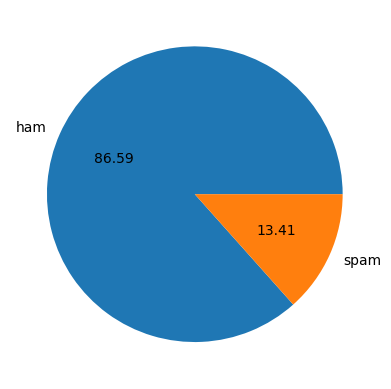

In [105]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels={'ham' , 'spam'}, autopct="%0.2f")
plt.show()

In [106]:
# Data is imbalanced

In [107]:
!pip install nltk
import nltk

In [108]:
import nltk

In [109]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [110]:
df['text']

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [111]:
df['num_characters'] = df['text'].apply(len)

In [112]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [113]:
from nltk.tokenize import word_tokenize

In [114]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
print(df['num_words'])

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_words, Length: 5572, dtype: int64


In [115]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [116]:
 df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [117]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [118]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
#ham

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [120]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
#spam

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [121]:
%pip install seaborn
import seaborn as sns

In [122]:
df[df['target'] == 0]['num_characters']

,num_characters
0,111
1,29
3,49
4,61
6,77
...,...
5565,12
5568,37
5569,57
5570,125


<Axes: xlabel='num_characters', ylabel='Count'>

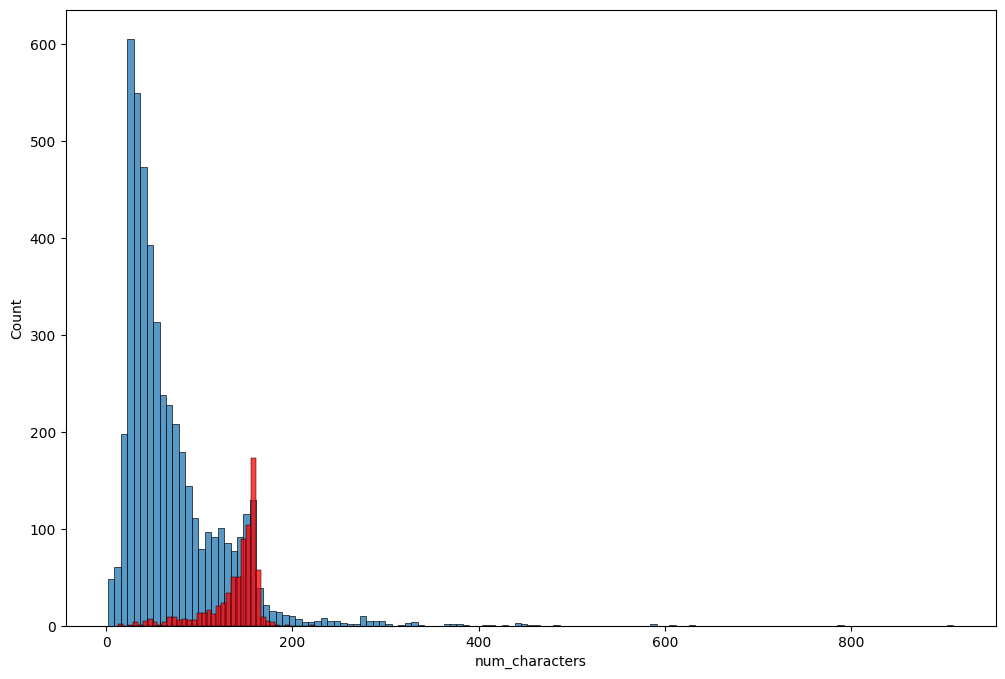

In [123]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

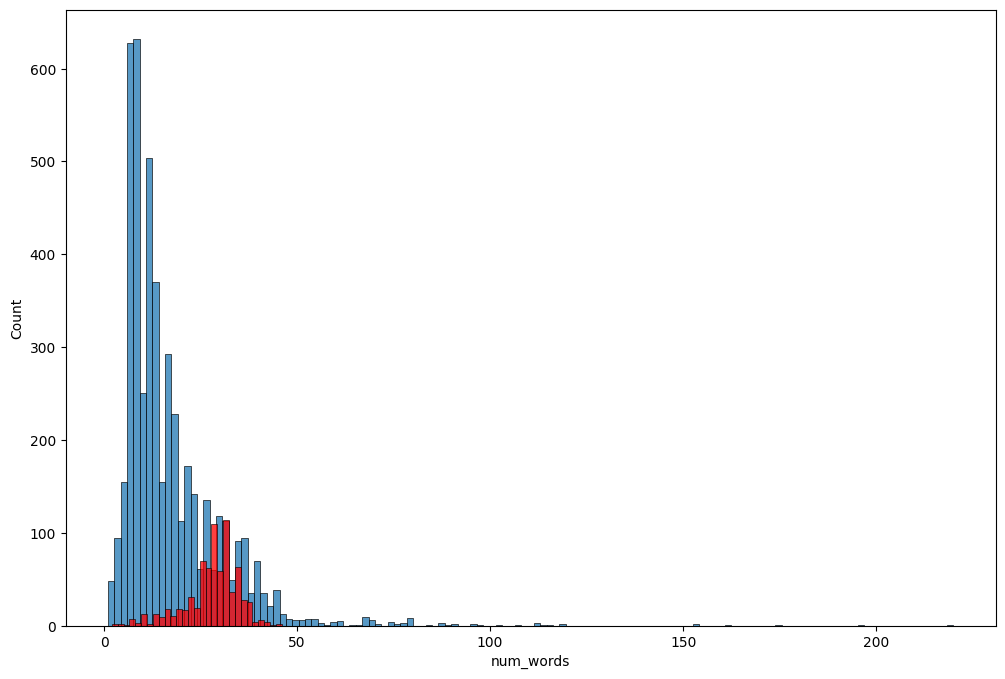

In [124]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

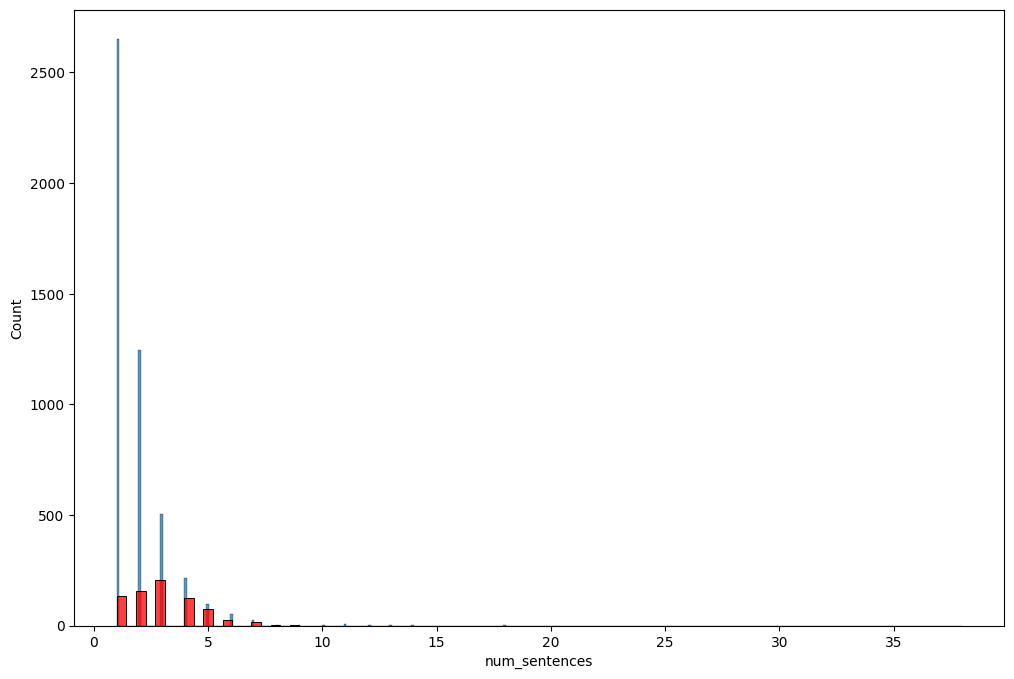

In [125]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

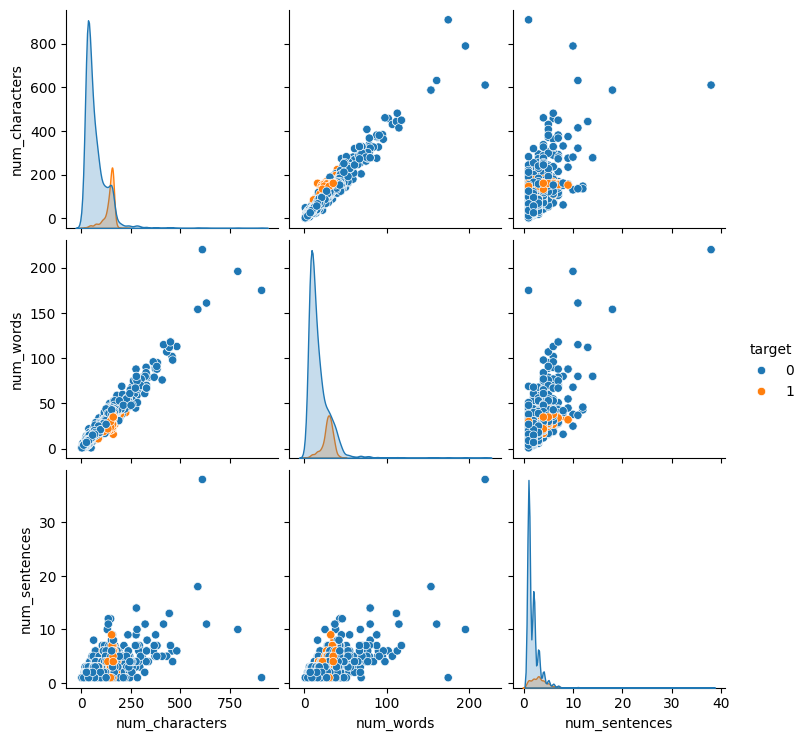

In [126]:
sns.pairplot(df,hue='target')

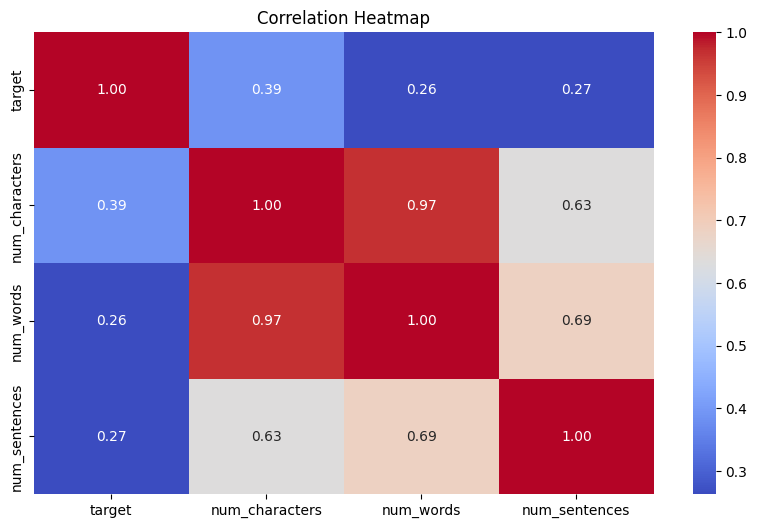

In [127]:
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing
+ Lower Case
+ Tokenization
+ Removing special characters
+ Removing stop words and punctuation
+stemming

In [128]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [129]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [130]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            z = ps.stem(i)
            y.append(z)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            z = ps.stem(i)
            y.append(z)
    return y

In [131]:
transform_text('Hi How Are %% loving You?')

['hi', 'love']

In [132]:
df['transformed_text'] = df['text'].apply(transform_text)

In [133]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, onli, bugi, ..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [134]:
%pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color= 'white')

In [135]:
spam_wc= wc.generate(df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep= ""))

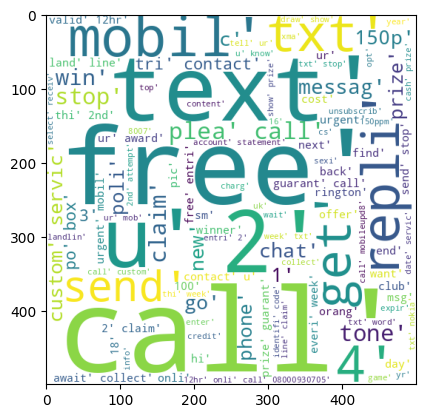

In [136]:
plt.imshow(spam_wc)

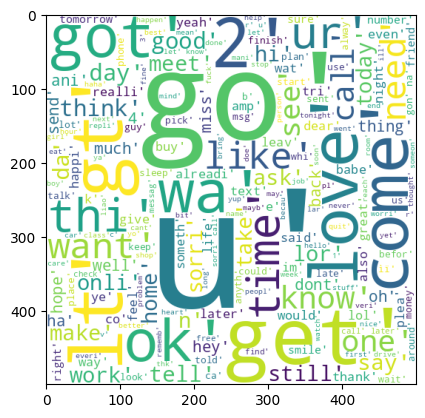

In [137]:
ham_wc= wc.generate(df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep= ""))
plt.imshow(ham_wc)

In [138]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text']:
    if isinstance(msg, list):  # Convert list to string
        msg = " ".join(map(str, msg))
    elif not isinstance(msg, str):  # Convert other types to string
        msg = str(msg)

    spam_corpus.extend(msg.split())  # Add words individually

In [139]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'onli',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 

In [140]:
len(spam_corpus)

11738

In [141]:

from collections import Counter
Counter(spam_corpus)

Counter({'free': 219,
         'entri': 26,
         '2': 174,
         'wkli': 14,
         'comp': 10,
         'win': 61,
         'fa': 4,
         'cup': 5,
         'final': 17,
         'tkt': 4,
         '21st': 2,
         'may': 7,
         'text': 139,
         '87121': 4,
         'receiv': 37,
         'question': 12,
         'std': 9,
         'txt': 169,
         'rate': 31,
         'c': 51,
         'appli': 29,
         '08452810075over18': 2,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 23,
         'week': 62,
         'word': 25,
         'back': 23,
         'like': 13,
         'fun': 9,
         'still': 7,
         'tb': 1,
         'ok': 5,
         'xxx': 11,
         'chg': 2,
         'send': 70,
         'rcv': 2,
         'winner': 16,
         'valu': 11,
         'network': 28,
         'custom': 51,
         'select': 31,
         'receivea': 2,
         'prize': 94,
         'reward': 10,
         'claim': 115,
       

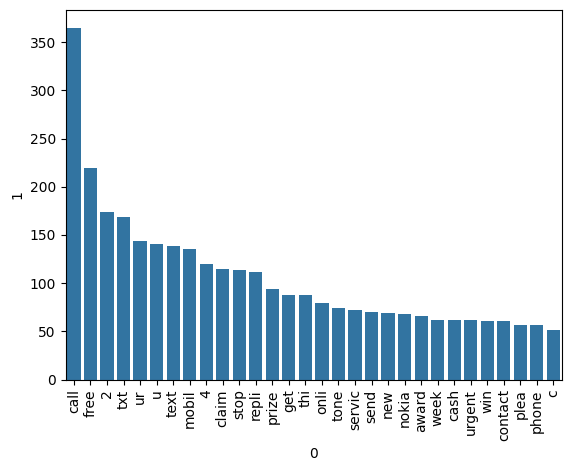

In [142]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [143]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text']:
    if isinstance(msg, list):  # Convert list to string
        msg = " ".join(map(str, msg))
    elif not isinstance(msg, str):  # Convert other types to string
        msg = str(msg)

    ham_corpus.extend(msg.split())  # Add words individually

In [144]:
len(ham_corpus)
Counter(ham_corpus)

Counter({'go': 417,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 14,
         'onli': 133,
         'bugi': 7,
         'n': 139,
         'great': 104,
         'world': 38,
         'la': 7,
         'e': 78,
         'buffet': 2,
         'cine': 7,
         'got': 242,
         'amor': 1,
         'wat': 112,
         'ok': 245,
         'lar': 38,
         'joke': 16,
         'wif': 27,
         'u': 979,
         'oni': 4,
         'dun': 55,
         'say': 138,
         'earli': 33,
         'hor': 3,
         'c': 60,
         'alreadi': 90,
         'nah': 10,
         'think': 151,
         'goe': 26,
         'usf': 10,
         'live': 27,
         'around': 59,
         'though': 26,
         'even': 85,
         'brother': 19,
         'like': 244,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 12,
         'request': 9,
         'mell': 3,
         'oru': 4,
         'minnaminu

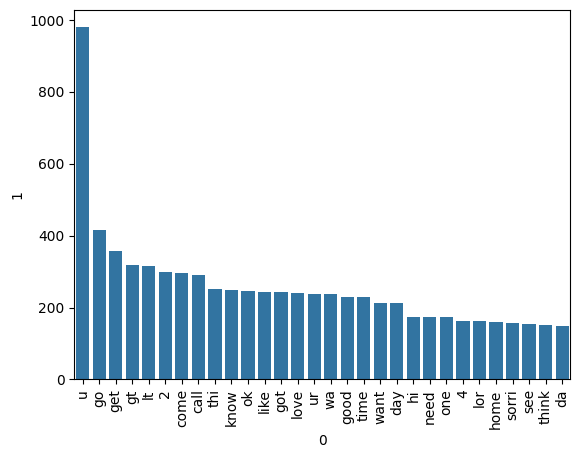

In [145]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

MODEL BUILDING


using Naive Bayes Theorem as its awesome with textual data

In [146]:
!pip install scikit-learn

In [147]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [148]:
df['transformed_text'] = df['transformed_text'].astype(str)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [149]:
X.shape

(5572, 3000)

In [150]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =2)

In [153]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8663677130044843
[[840 117]
 [ 32 126]]
0.5185185185185185


In [155]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [156]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9748878923766816
[[955   2]
 [ 26 132]]
0.9850746268656716


## **tfidf ----> mnb**

In [157]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [158]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [159]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [160]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9730941704035875, 0.9923076923076923)

In [161]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9730941704035875
Precision -  0.9923076923076923
For  KN
Accuracy -  0.9031390134529148
Precision -  1.0
For  NB
Accuracy -  0.9650224215246637
Precision -  0.9917355371900827
For  DT
Accuracy -  0.9264573991031391
Precision -  0.8877551020408163
For  LR
Accuracy -  0.9506726457399103
Precision -  0.9557522123893806
For  RF
Accuracy -  0.968609865470852
Precision -  1.0
For  AdaBoost
Accuracy -  0.9121076233183857
Precision -  0.8947368421052632
For  BgC
Accuracy -  0.9614349775784753
Precision -  0.9323308270676691
For  ETC
Accuracy -  0.9704035874439462
Precision -  1.0
For  GBDT
Accuracy -  0.9434977578475336
Precision -  0.9523809523809523
For  xgb
Accuracy -  0.9623318385650225
Precision -  0.9833333333333333


In [162]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [163]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903139,1.000000
8,ETC,0.970404,1.000000
5,RF,0.968610,1.000000
0,SVC,0.973094,0.992308
2,NB,0.965022,0.991736
10,xgb,0.962332,0.983333
4,LR,0.950673,0.955752
9,GBDT,0.943498,0.952381
7,BgC,0.961435,0.932331
6,AdaBoost,0.912108,0.894737


In [164]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.903139
1,ETC,Accuracy,0.970404
2,RF,Accuracy,0.968610
3,SVC,Accuracy,0.973094
4,NB,Accuracy,0.965022
5,xgb,Accuracy,0.962332
6,LR,Accuracy,0.950673
7,GBDT,Accuracy,0.943498
8,BgC,Accuracy,0.961435
9,AdaBoost,Accuracy,0.912108


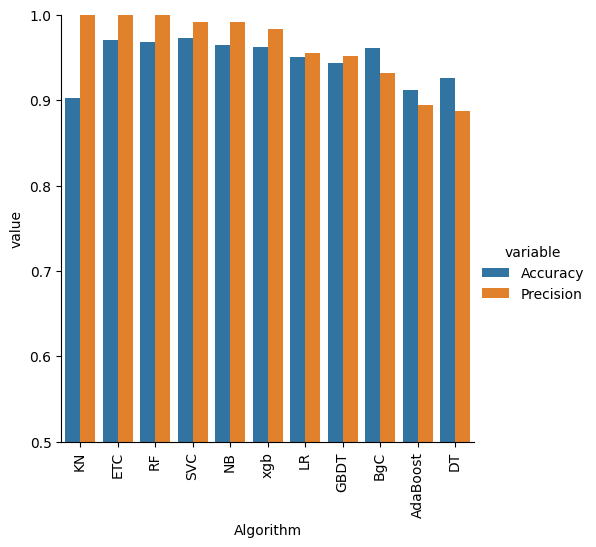

In [165]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [166]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [167]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.903139,1.000000
8,ETC,0.970404,1.000000
5,RF,0.968610,1.000000
0,SVC,0.973094,0.992308
2,NB,0.965022,0.991736
10,xgb,0.962332,0.983333
4,LR,0.950673,0.955752
9,GBDT,0.943498,0.952381
7,BgC,0.961435,0.932331
6,AdaBoost,0.912108,0.894737


In [168]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.903139,1.000000
8,ETC,0.970404,1.000000
5,RF,0.968610,1.000000
0,SVC,0.973094,0.992308
2,NB,0.965022,0.991736
10,xgb,0.962332,0.983333
4,LR,0.950673,0.955752
9,GBDT,0.943498,0.952381
7,BgC,0.961435,0.932331
6,AdaBoost,0.912108,0.894737


In [169]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.903139,1.000000,0.903139,1.000000
1,ETC,0.970404,1.000000,0.970404,1.000000
2,RF,0.968610,1.000000,0.968610,1.000000
3,SVC,0.973094,0.992308,0.973094,0.992308
4,NB,0.965022,0.991736,0.965022,0.991736
5,xgb,0.962332,0.983333,0.962332,0.983333
6,LR,0.950673,0.955752,0.950673,0.955752
7,GBDT,0.943498,0.952381,0.943498,0.952381
8,BgC,0.961435,0.932331,0.961435,0.932331
9,AdaBoost,0.912108,0.894737,0.912108,0.894737


In [170]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
new_df_scaled


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y
0,KN,0.903139,1.000000,0.903139,1.000000,0.903139,1.000000
1,ETC,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
2,RF,0.968610,1.000000,0.968610,1.000000,0.968610,1.000000
3,SVC,0.973094,0.992308,0.973094,0.992308,0.973094,0.992308
4,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
5,xgb,0.962332,0.983333,0.962332,0.983333,0.962332,0.983333
6,LR,0.950673,0.955752,0.950673,0.955752,0.950673,0.955752
7,GBDT,0.943498,0.952381,0.943498,0.952381,0.943498,0.952381
8,BgC,0.961435,0.932331,0.961435,0.932331,0.961435,0.932331
9,AdaBoost,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737


In [171]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [172]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.903139,1.000000,0.903139,1.000000,0.903139,1.000000,0.903139,1.000000
1,ETC,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000,0.970404,1.000000
2,RF,0.968610,1.000000,0.968610,1.000000,0.968610,1.000000,0.968610,1.000000
3,SVC,0.973094,0.992308,0.973094,0.992308,0.973094,0.992308,0.973094,0.992308
4,NB,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736,0.965022,0.991736
5,xgb,0.962332,0.983333,0.962332,0.983333,0.962332,0.983333,0.962332,0.983333
6,LR,0.950673,0.955752,0.950673,0.955752,0.950673,0.955752,0.950673,0.955752
7,GBDT,0.943498,0.952381,0.943498,0.952381,0.943498,0.952381,0.943498,0.952381
8,BgC,0.961435,0.932331,0.961435,0.932331,0.961435,0.932331,0.961435,0.932331
9,AdaBoost,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737,0.912108,0.894737


In [173]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


from sklearn.ensemble import VotingClassifier

In [174]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')


In [175]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [176]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9766816143497757
Precision 1.0


In [177]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [178]:
from sklearn.ensemble import StackingClassifier

In [179]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [180]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9811659192825112
Precision 0.9928057553956835


In [181]:
mnb.fit(X_train, y_train)  # Train the model

y_pred = mnb.predict(X_test)  # Predict to check if working
print("Sample Prediction:", y_pred[:5])

Sample Prediction: [0 0 0 0 0]


In [183]:
import pickle
pickle.dump(tfidf ,open('vectorizer.pkl', 'wb'))
pickle.dump(mnb,open('model.pkl','wb'))